In [1]:
import random
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
books = []
for i in range(5):
    books.append(pd.read_csv('asoiaf/data/asoiaf-book{}-edges.csv'.format(i+1)))

all_books = pd.concat(books)
all_books.head()
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
edges.sort_values('weight',ascending=False).head()
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )
print("===============DataSet info==============")
print("Number of nodes:", nx.number_of_nodes(GOT))
print("Number of edges:", nx.number_of_edges(GOT))
print("Graph density:", nx.density(GOT))
num_edges = nx.number_of_edges(GOT)
print("Number of Edges:", num_edges)
avg_degree = 2 * num_edges / nx.number_of_nodes(GOT)
print("Average Degree:", avg_degree)

weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())
import seaborn as sns
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])
print("\n===============Graph info=============")
print("Number of nodes:", nx.number_of_nodes(subG))
print("Number of edges:", nx.number_of_edges(subG))
print("Graph density:", nx.density(subG))
num_edges = nx.number_of_edges(subG)
print("Number of Edges:", num_edges)
avg_degree = 2 * num_edges / nx.number_of_nodes(subG)
print("Average Degree:", avg_degree)

===============DataSet info==============
Number of nodes: 796
Number of edges: 2823
Graph density: 0.008921968332227173
Number of Edges: 2823
Average Degree: 7.092964824120603

===============Graph info=============
Number of nodes: 63
Number of edges: 496
Graph density: 0.25396825396825395
Number of Edges: 496
Average Degree: 15.746031746031745


In [2]:
all_books.head(10)

Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
5  Aemon-Targaryen-(Maester-Aemon)         Bowen-Marsh  Undirected       4   
6  Aemon-Targaryen-(Maester-Aemon)               Chett  Undirected       9   
7  Aemon-Targaryen-(Maester-Aemon)              Clydas  Undirected       5   
8  Aemon-Targaryen-(Maester-Aemon)        Jeor-Mormont  Undirected      13   
9  Aemon-Targaryen-(Maester-Aemon)            Jon-Snow  Undirected      34   

   book  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0  
5   1.0  
6   1.0  
7   1.0  
8   1.0  
9   1.0

In [3]:
all_books.tail(10)

Source                        Target        Type  \
750             Tyrion-Lannister                         Tysha  undirected   
751             Tyrion-Lannister               Tywin-Lannister  undirected   
752             Tyrion-Lannister                         Varys  undirected   
753             Tyrion-Lannister                        Yandry  undirected   
754             Tyrion-Lannister              Yezzan-zo-Qaggaz  undirected   
755             Tyrion-Lannister                        Ysilla  undirected   
756              Tywin-Lannister                Wylis-Manderly  undirected   
757            Victarion-Greyjoy                         Wulfe  undirected   
758  Walder-Frey-(son-of-Jammos)  Walder-Frey-(son-of-Merrett)  undirected   
759                       Yandry                        Ysilla  undirected   

     weight  book  
750       4   5.0  
751      18   5.0  
752       7   5.0  
753      15   5.0  
754      17   5.0  
755      11   5.0  
756       3   5.0  
757       3   5.0  
758      10   5.0  
759      14   5.0

In [4]:
all_books

Source                        Target  \
0                     Addam-Marbrand               Jaime-Lannister   
1                     Addam-Marbrand               Tywin-Lannister   
2                  Aegon-I-Targaryen            Daenerys-Targaryen   
3                  Aegon-I-Targaryen                  Eddard-Stark   
4    Aemon-Targaryen-(Maester-Aemon)                Alliser-Thorne   
..                               ...                           ...   
755                 Tyrion-Lannister                        Ysilla   
756                  Tywin-Lannister                Wylis-Manderly   
757                Victarion-Greyjoy                         Wulfe   
758      Walder-Frey-(son-of-Jammos)  Walder-Frey-(son-of-Merrett)   
759                           Yandry                        Ysilla   

           Type  weight  book  
0    Undirected       3   1.0  
1    Undirected       6   1.0  
2    Undirected       5   1.0  
3    Undirected       4   1.0  
4    Undirected       4   1.0  
..          ...     ...   ...  
755  undirected      11   5.0  
756  undirected       3   5.0  
757  undirected       3   5.0  
758  undirected      10   5.0  
759  undirected      14   5.0  

[3909 rows x 5 columns]

Text(0.5, 0, '(No. of seeds)')

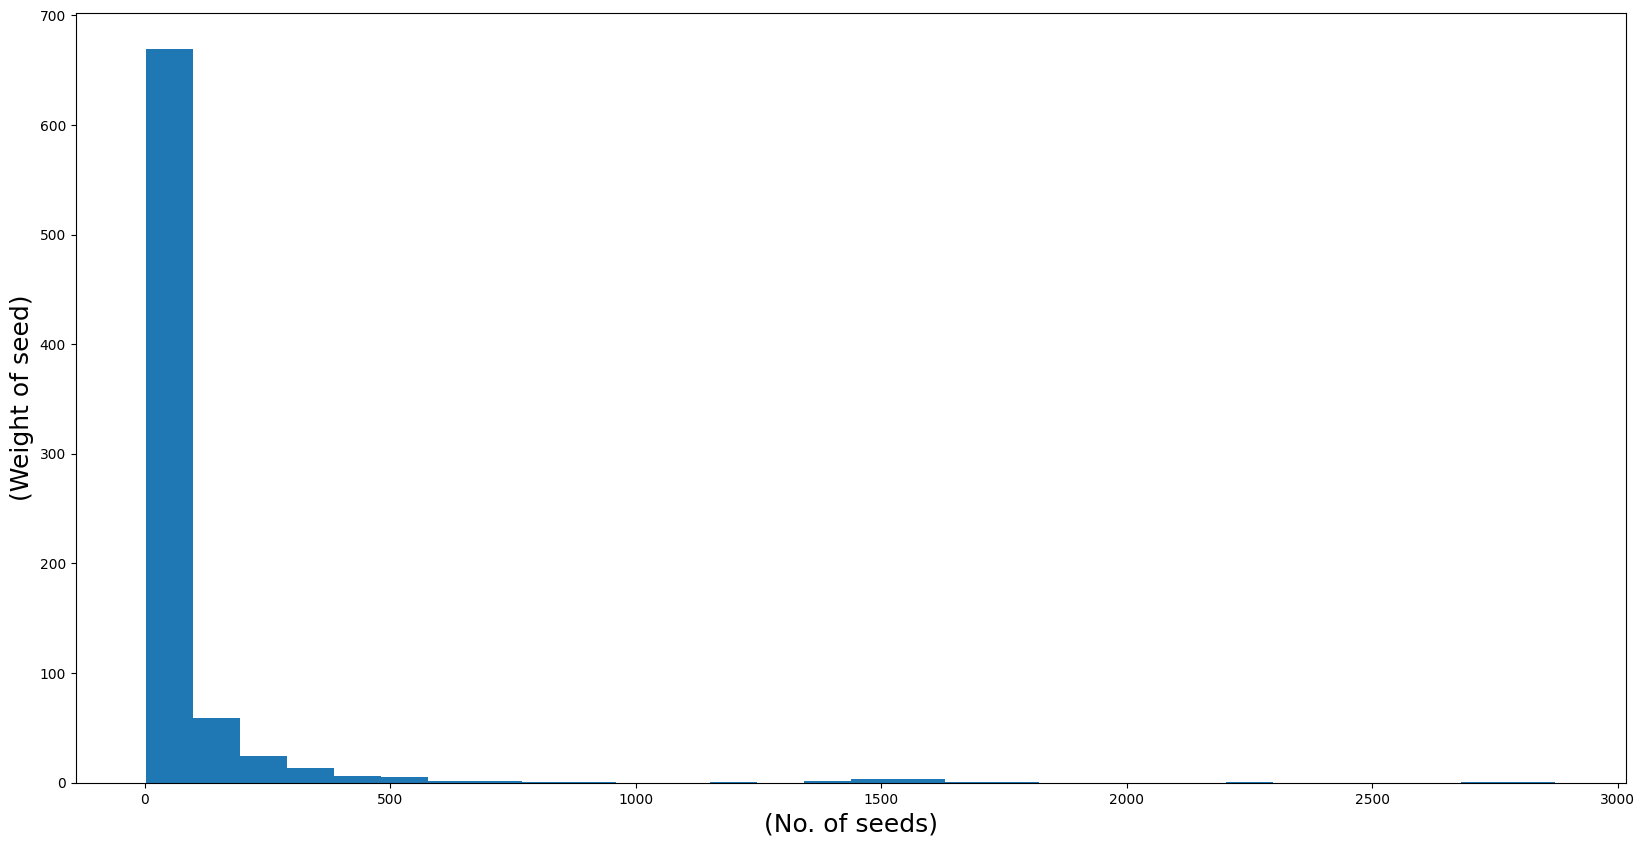

In [5]:
h = plt.hist(weighted_degrees.values(), bins = 30)
plt.ylabel('(Weight of seed)',fontsize = 18)
plt.xlabel('(No. of seeds)', fontsize = 18)

  0%|          | 0/63 [00:00<?, ?it/s]

3969 Seeding options


  0%|          | 0/3969 [00:00<?, ?it/s]

[('budget', 2),
 (('Daenerys-Targaryen', 'Jaime-Lannister'), 0.58),
 (('Samwell-Tarly', 'Stannis-Baratheon'), 0.57),
 (('Bronn', 'Catelyn-Stark'), 0.57),
 (('Cersei-Lannister', 'Daenerys-Targaryen'), 0.57),
 (('Theon-Greyjoy', 'Cersei-Lannister'), 0.57),
 (('Jorah-Mormont', 'Eddard-Stark'), 0.57),
 (('Joffrey-Baratheon', 'Quentyn-Martell'), 0.57),
 (('Tyrion-Lannister', 'Asha-Greyjoy'), 0.57),
 (('Sansa-Stark', 'Daenerys-Targaryen'), 0.57)]

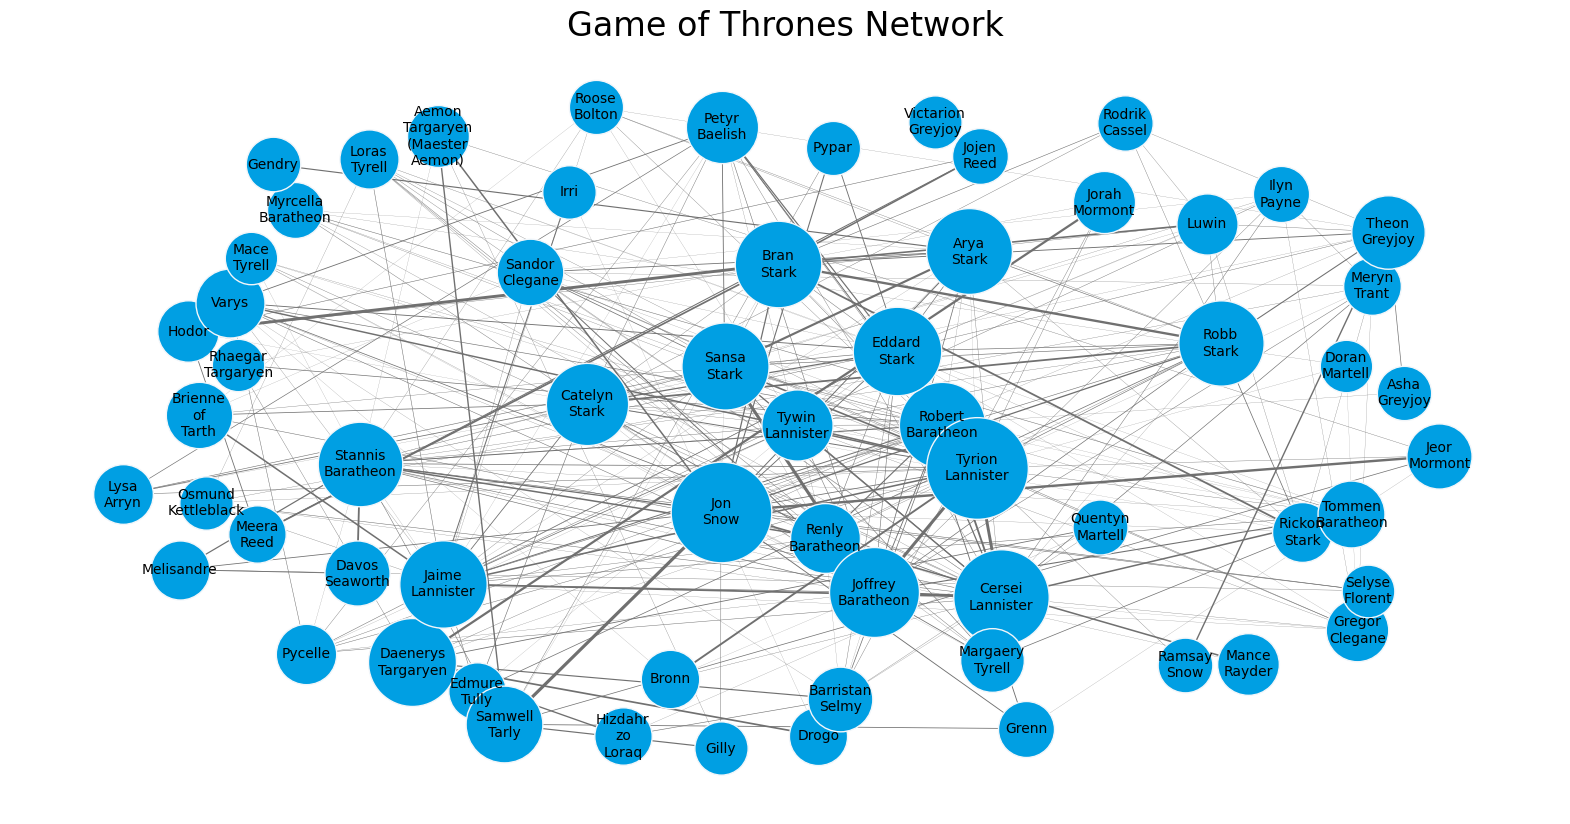

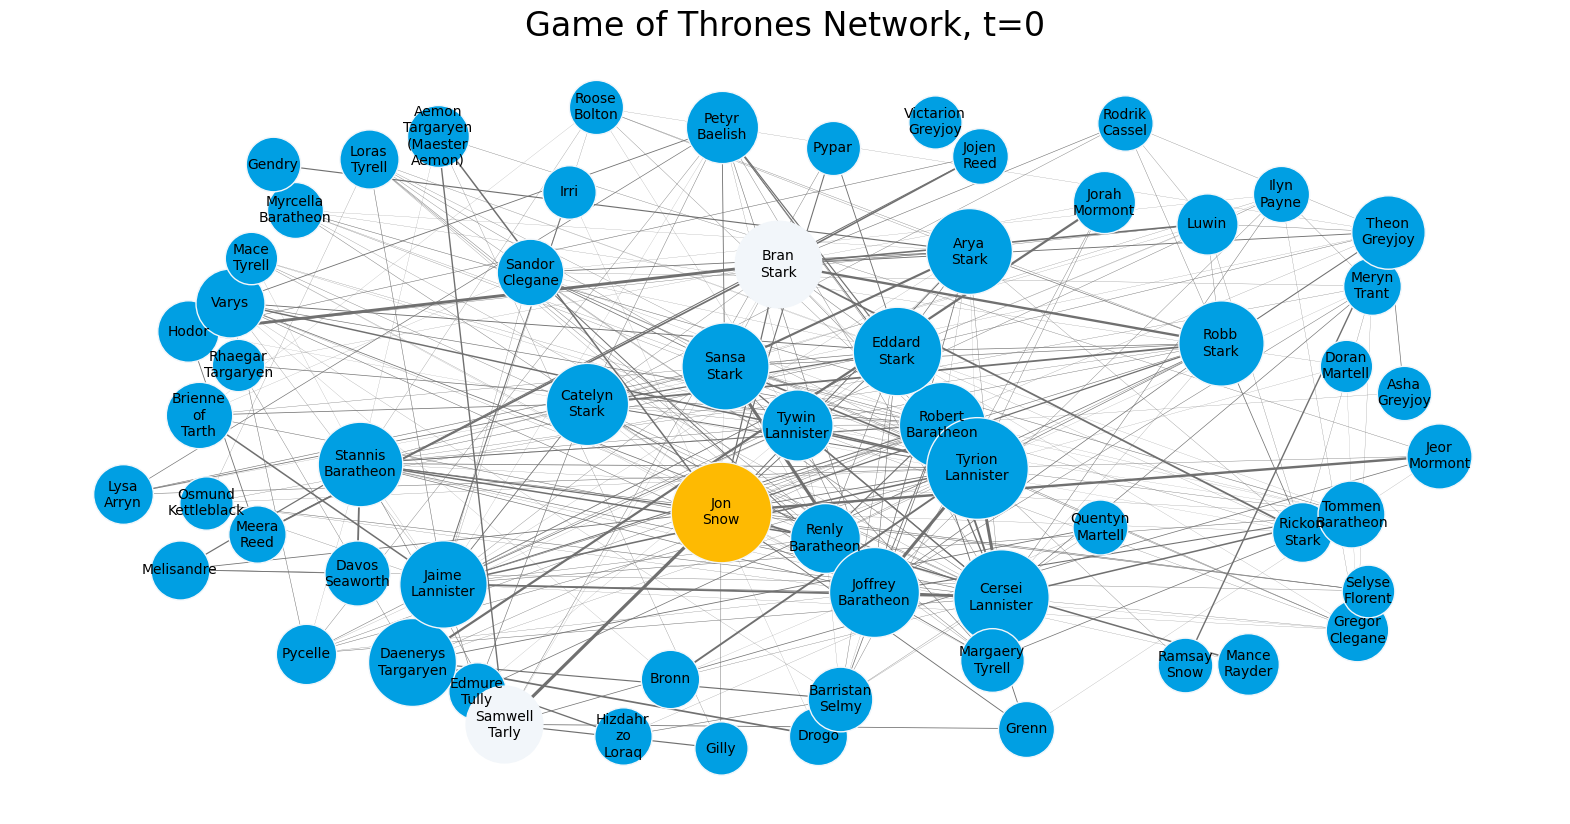

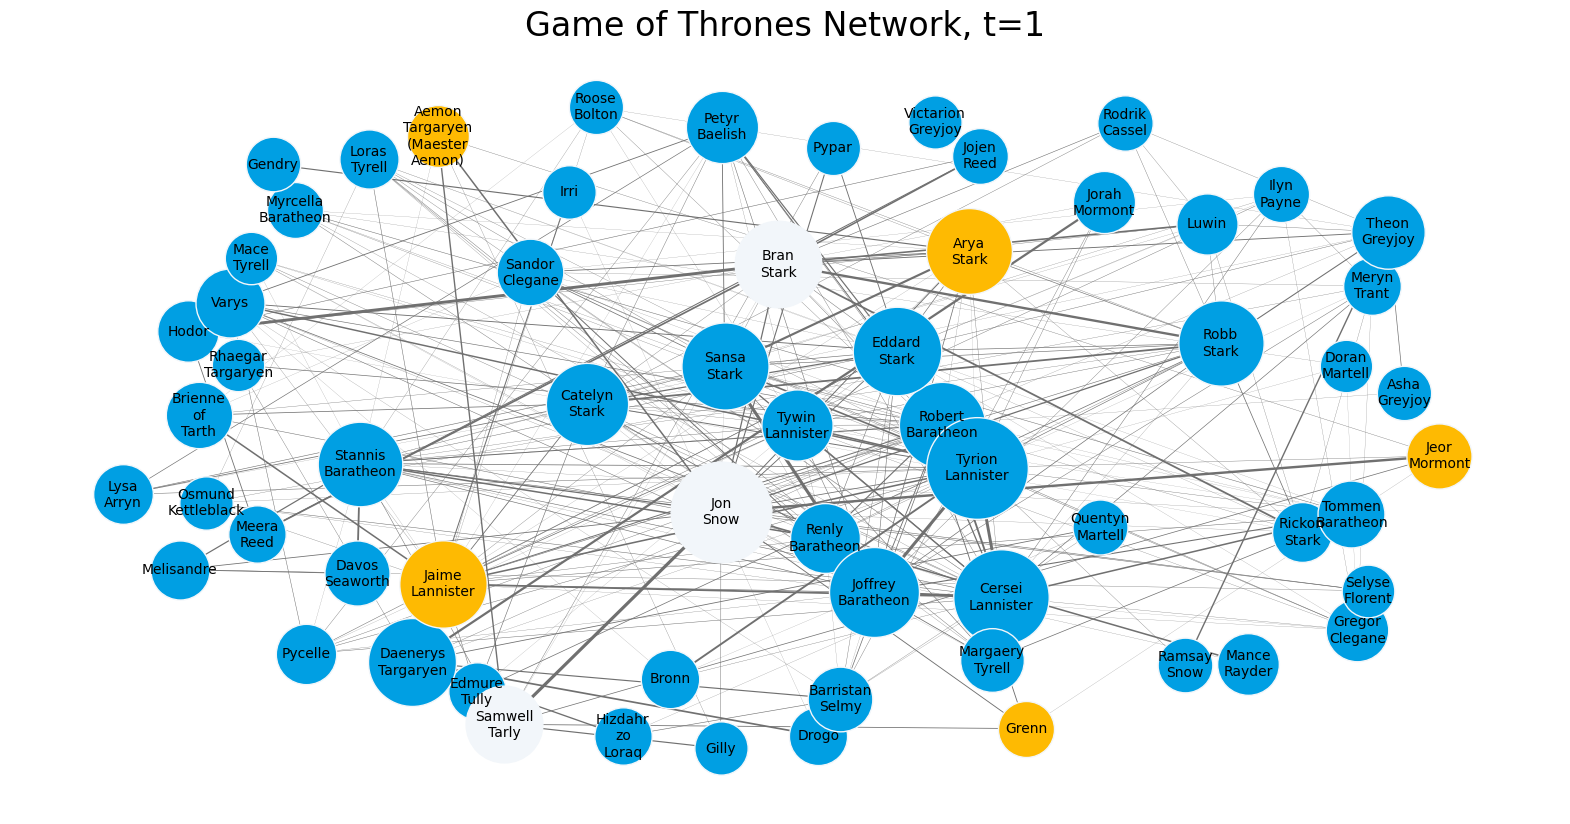

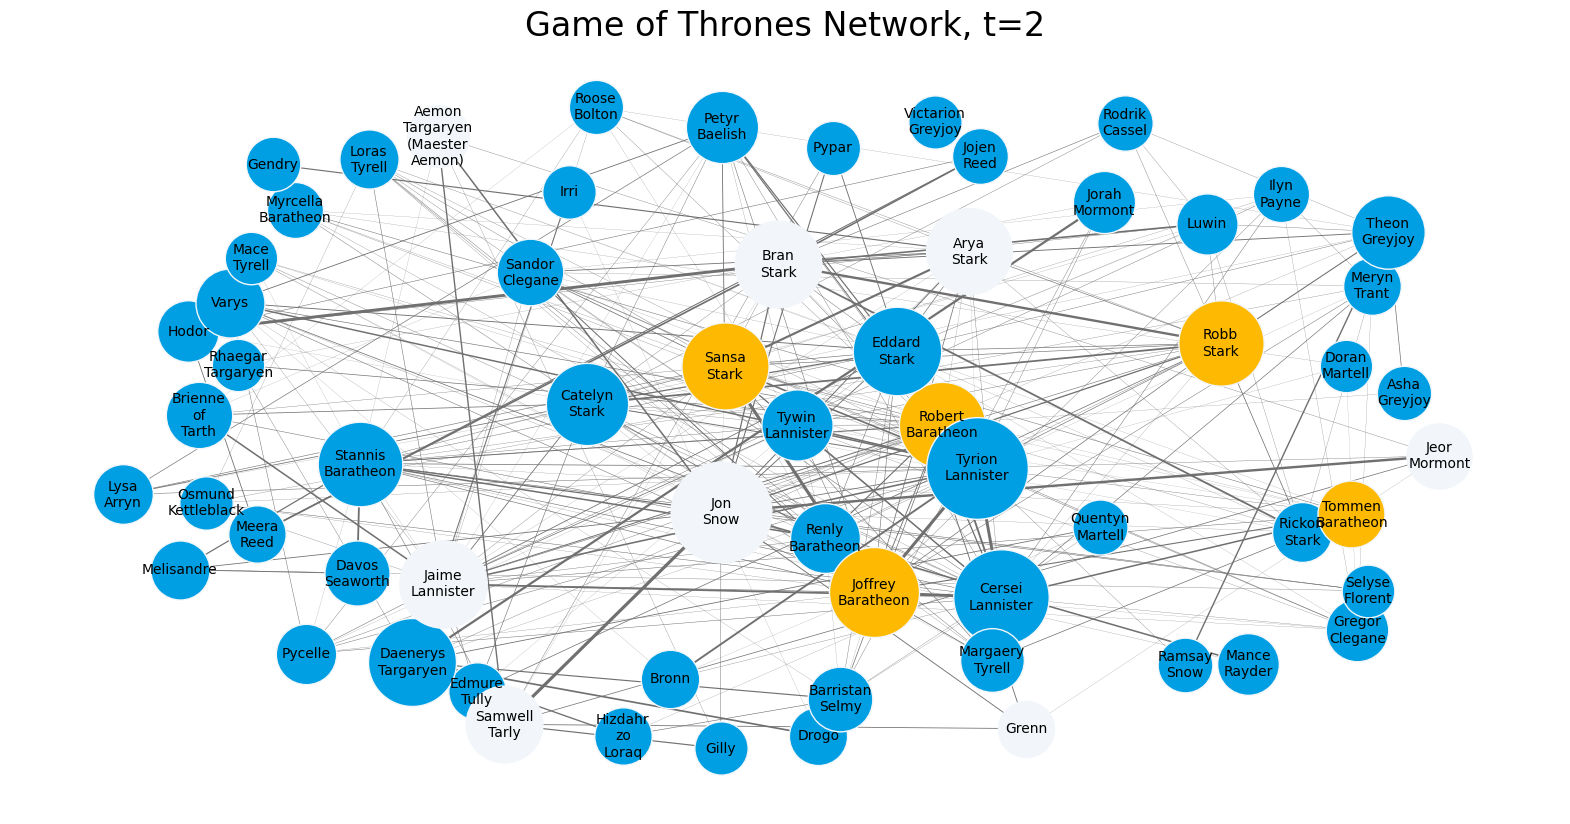

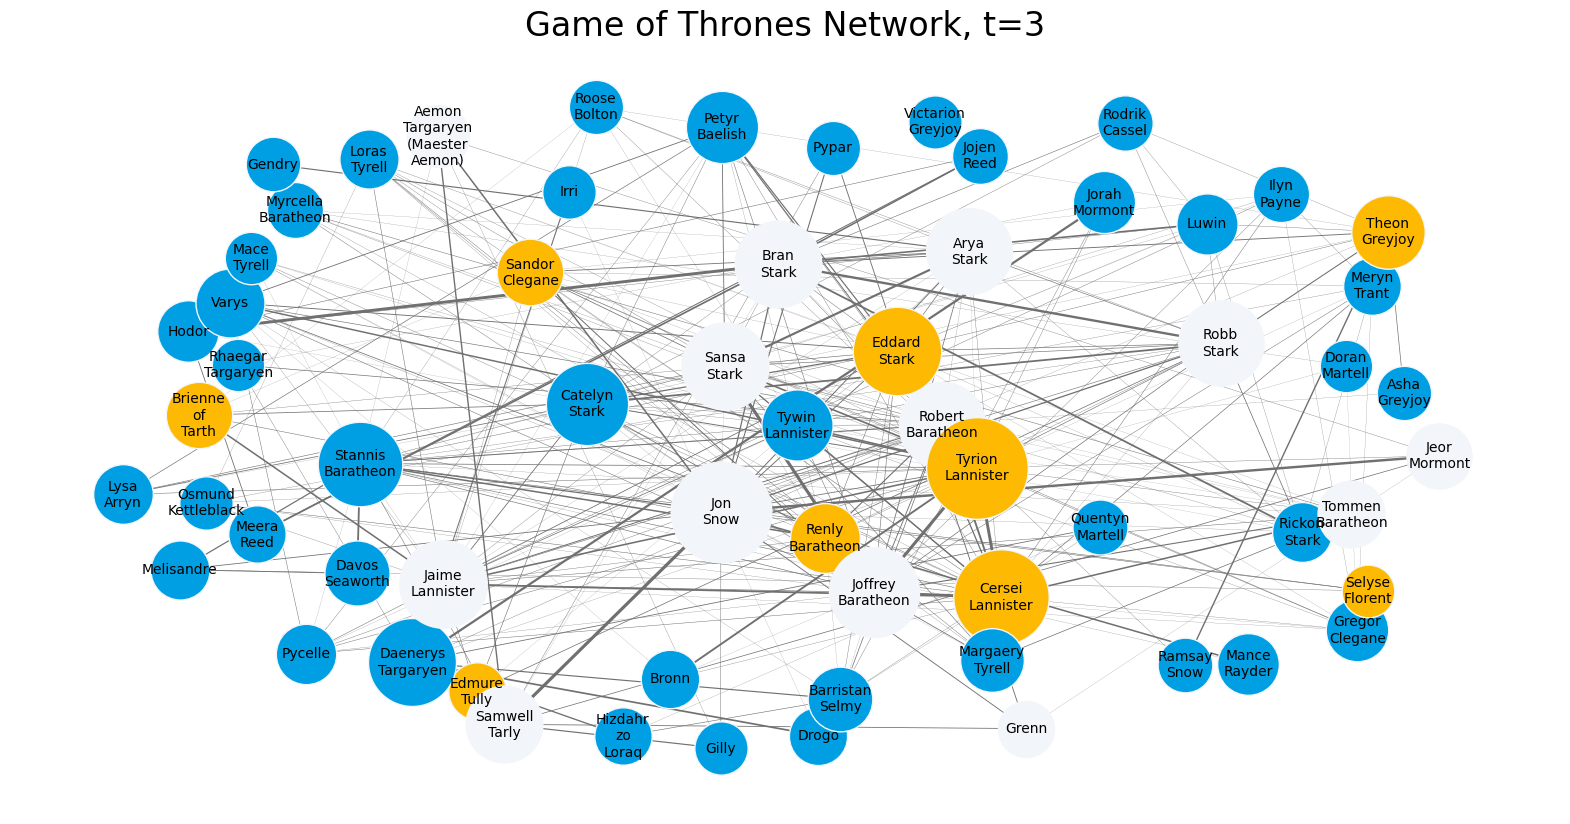

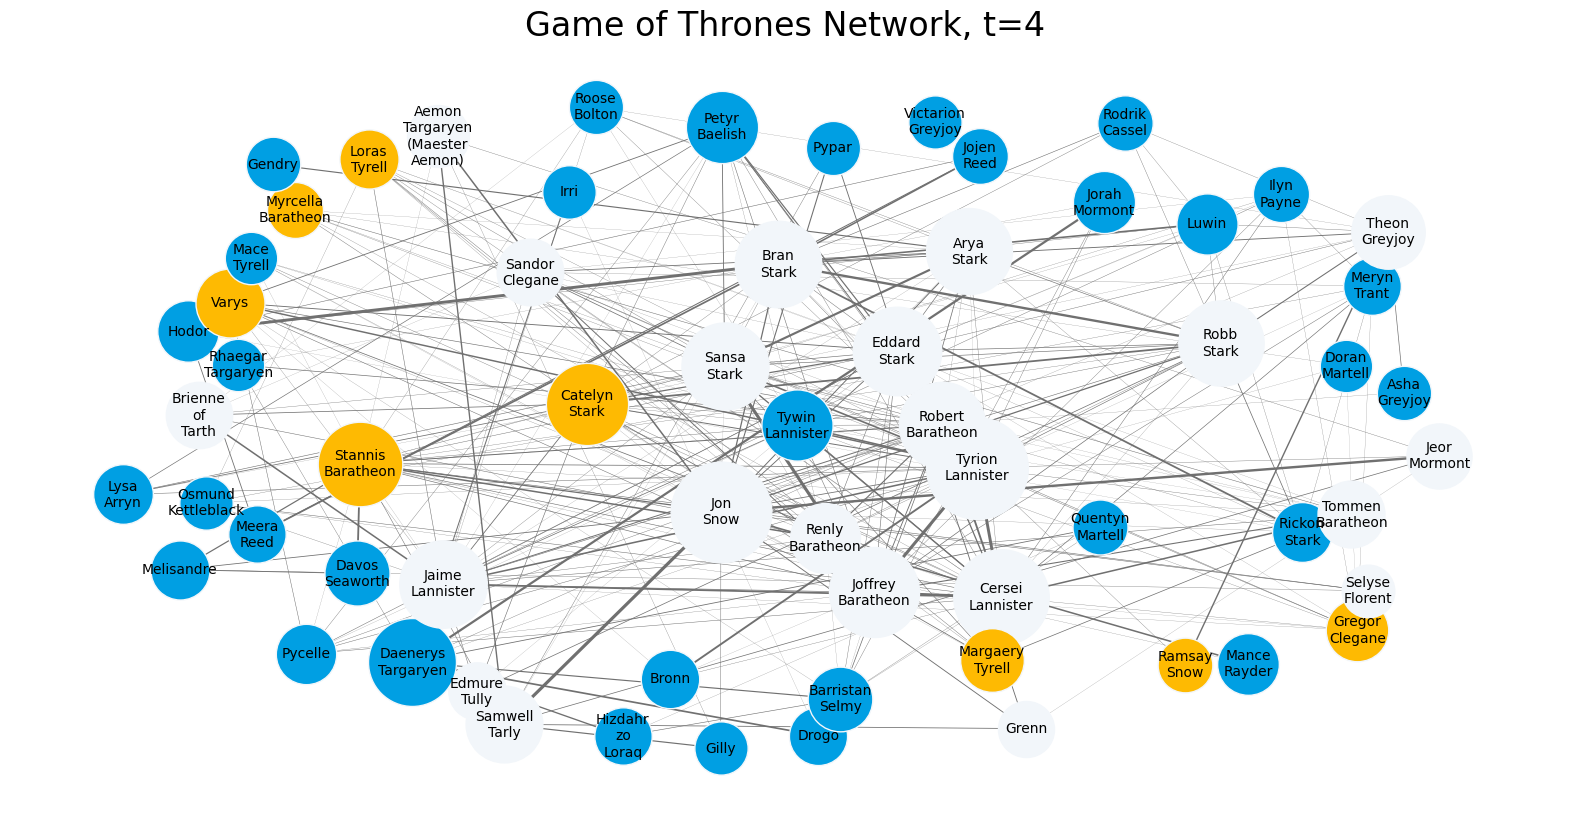

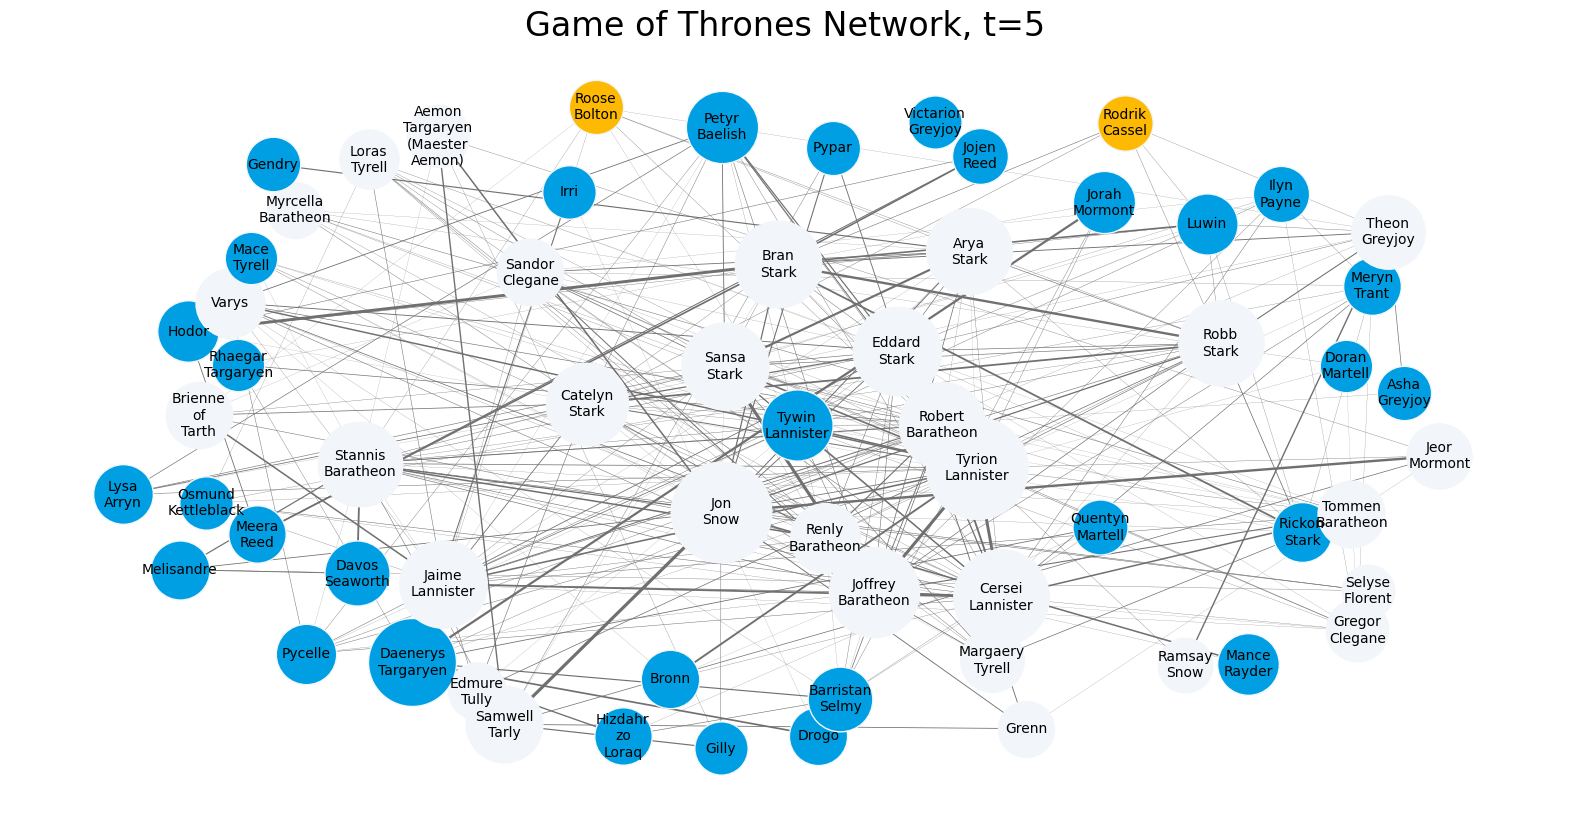

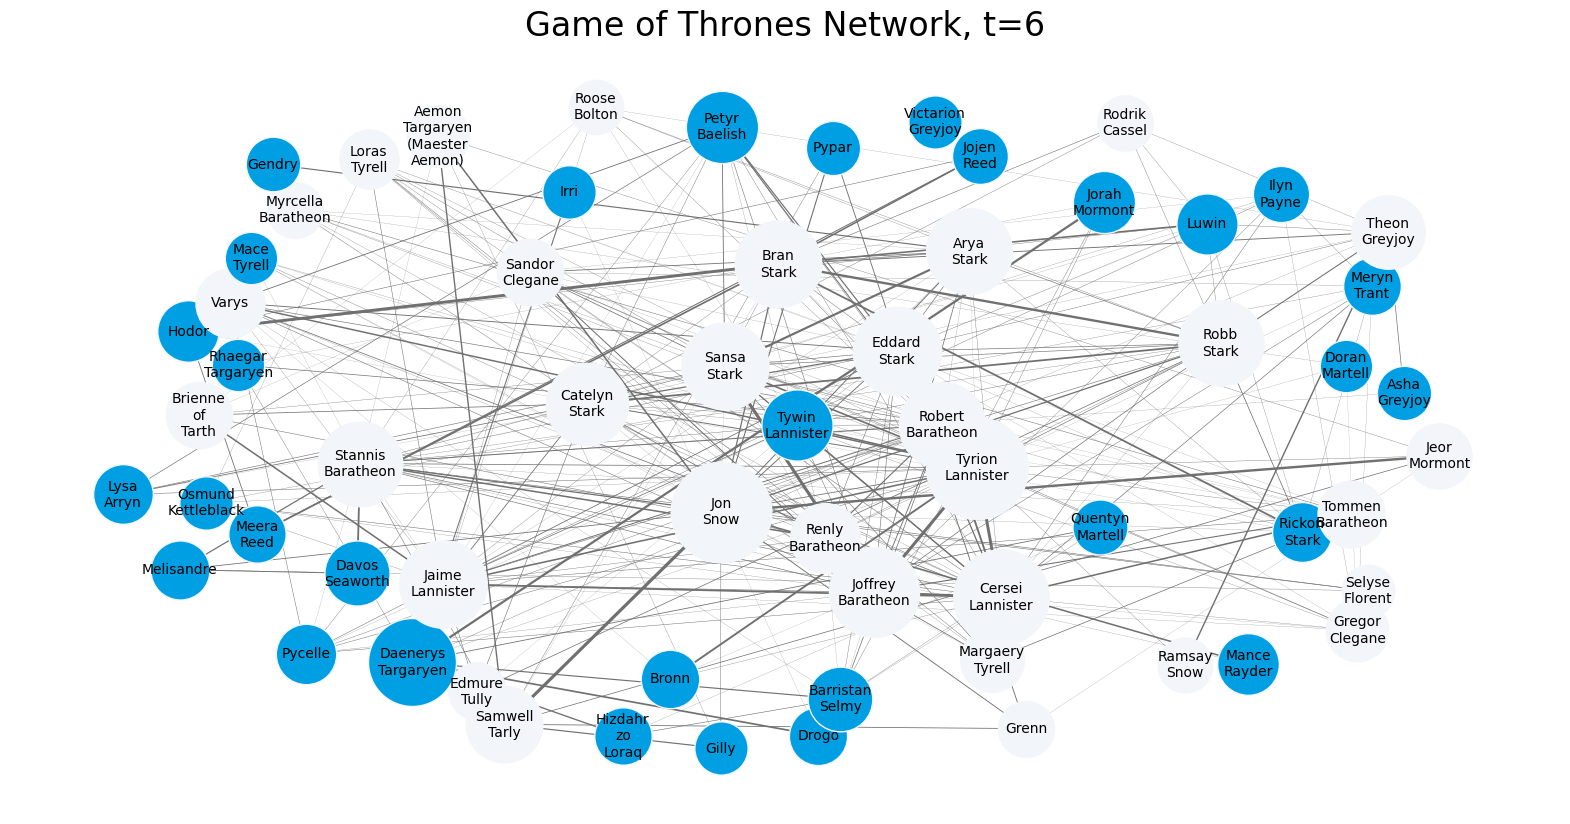

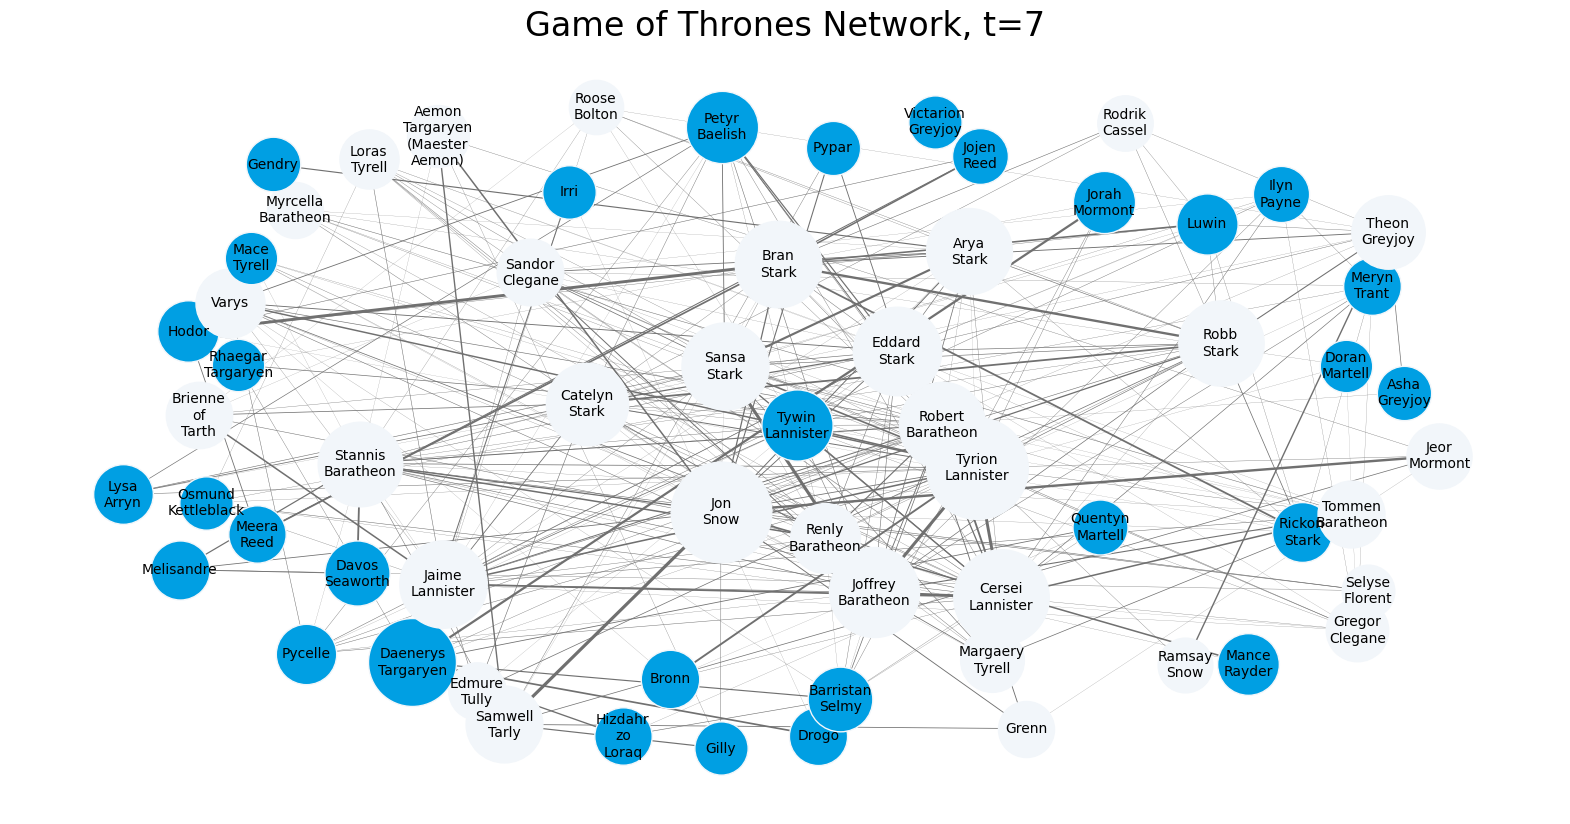

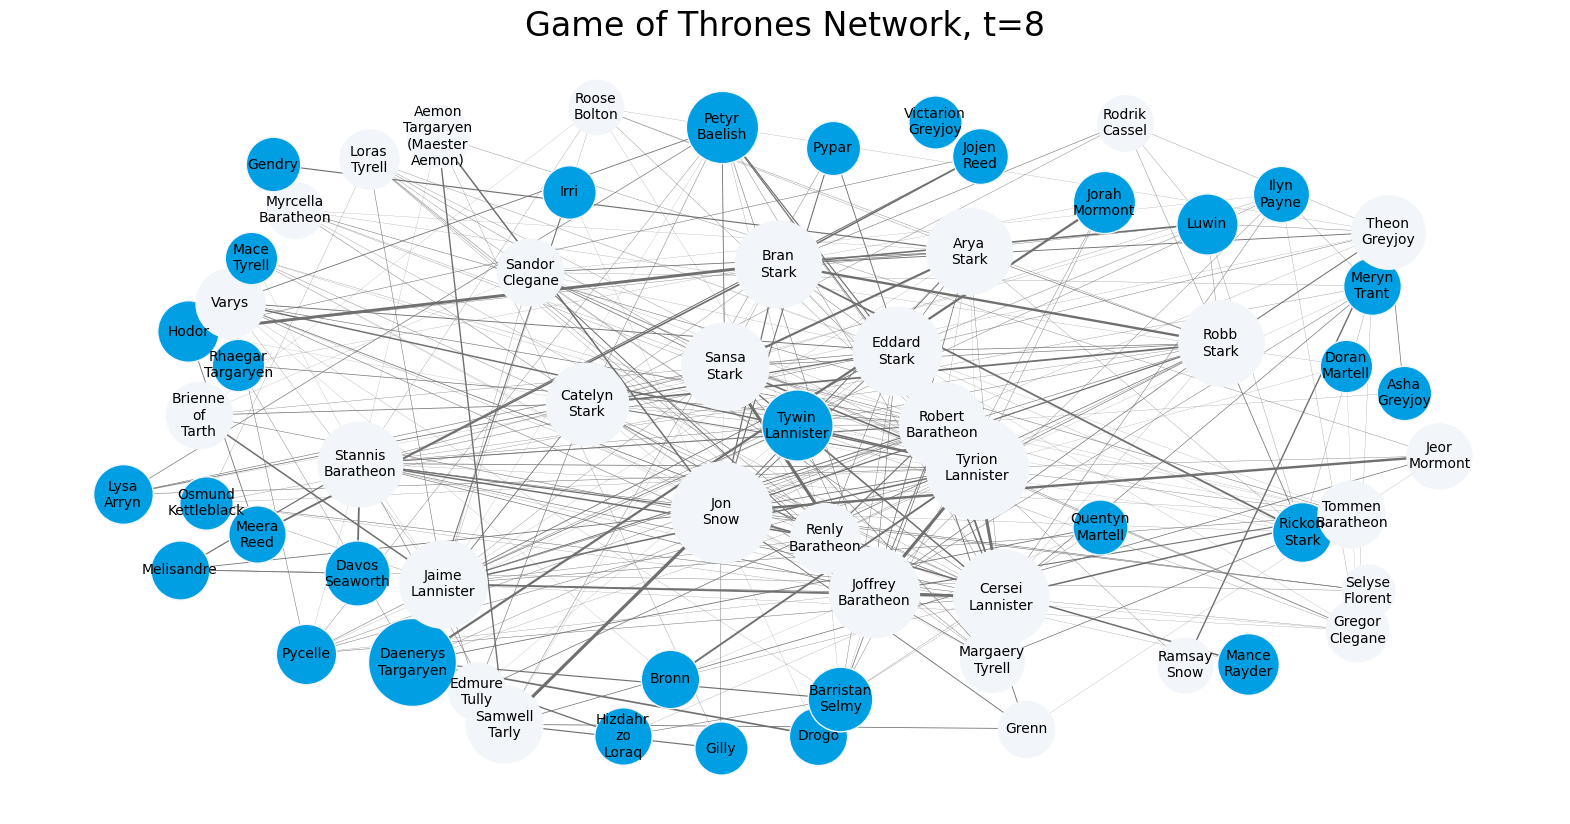

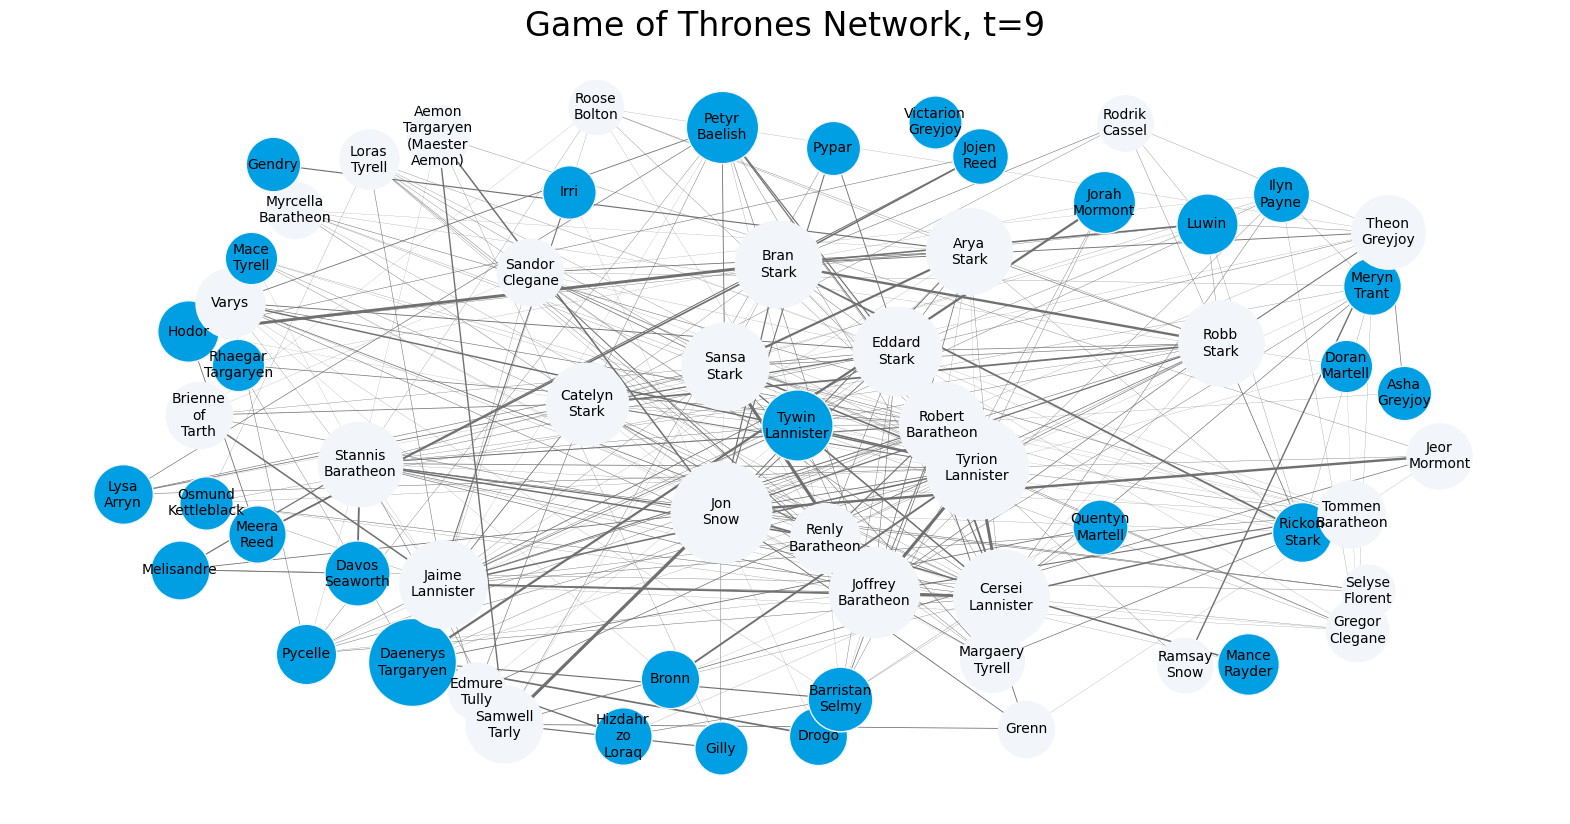

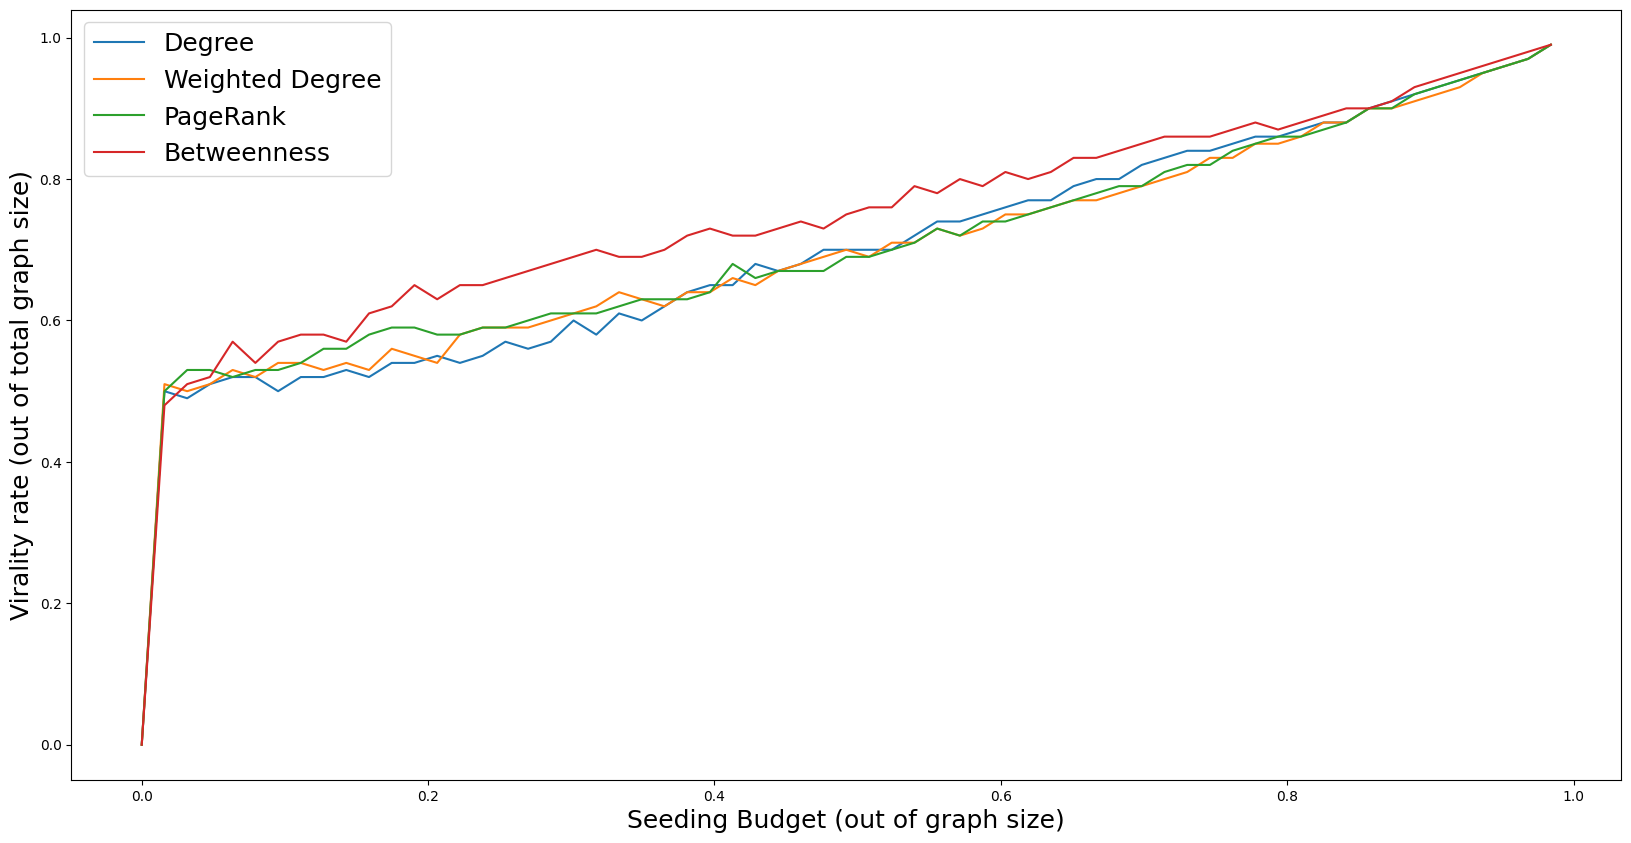

In [6]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

infection_times = {}

def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1

    return infection_times
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')

        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

infection_times = {'Bran-Stark':-1,'Samwell-Tarly':-1,'Jon-Snow':0}
for t in range(10):
    plot_G(subG,pos,infection_times,t)
    infection_times = independent_cascade(subG,t,infection_times)
top = pd.DataFrame.from_dict(dict(nx.degree(subG)),orient='index').sort_values(0,ascending=False)
top.columns = ['Degree']
top['Weighted Degree'] =  pd.DataFrame.from_dict(dict(nx.degree(subG,weight='weight')),orient='index')
top['PageRank'] = pd.DataFrame.from_dict(dict(nx.pagerank(subG, weight='weight')), orient='index')
top['Betweenness'] =  pd.DataFrame.from_dict(dict(nx.betweenness_centrality(subG,weight='weight')),orient='index')
methods = top.columns
max_budget = len(subG.nodes())
trials = 50
all_results = []
for budget in tqdm.tqdm_notebook(range(max_budget)):
    results = {'budget':budget}
    for method in methods:
        infections = []
        for i in range(trials):
            infected = 0
            t= 0
            infection_times = {n:0 for n in top.sort_values(method,ascending=False).index[:budget]}
            while len(infection_times)>infected:
                #t+=1
                infected = len(infection_times)
                infection_times = independent_cascade(subG,t,infection_times)
                t+=1
            infections.append(infected)
        results[method] = np.round(np.mean(infections)/len(subG.nodes()),2)

    all_results.append(results)
res_df = pd.concat([pd.DataFrame.from_dict(r,orient='index').T 
                        for r in all_results]).set_index('budget')

res_df.index = res_df.index/len(subG.nodes())
res_df.head()
res_df.plot()
plt.legend(fontsize = 18)
plt.ylabel('Virality rate (out of total graph size)',fontsize = 18)
plt.xlabel('Seeding Budget (out of graph size)', fontsize = 18)
from itertools import product

budget=2

seed_sets = list(product(*[subG.nodes()]*budget))

print(len(seed_sets),'Seeding options')
budget = 2
trials = 20
all_results = []
results = {'budget':budget}
for seed in tqdm.tqdm_notebook(seed_sets[:]):
    infections = []
    for i in range(trials):
        infected = 0
        t= 0
        infection_times = {n:0 for n in seed}
        while len(infection_times)>infected:
            #t+=1
            infected = len(infection_times)
            infection_times = independent_cascade(subG,t,infection_times)
            t+=1
        infections.append(infected)
    results[seed] = np.round(np.mean(infections)/len(subG.nodes()),2)

all_results.append(results)

sorted(results.items(), key = lambda x: x[1], reverse=True)[:10]

In [7]:
def genetic_algorithm(subG, budget, trials, generations, mutation_rate):
    population_size = 50

    # Initial population generation
    population = [random.sample(list(subG.nodes()), budget) for _ in range(population_size)]

    for generation in tqdm.tqdm_notebook(range(generations)):
        fitness_scores = []

        # Evaluate fitness for each individual in the population
        for seed_set in population:
            infections = []
            for _ in range(trials):
                infected = 0
                t = 0
                infection_times = {n: 0 for n in seed_set}
                while len(infection_times) > infected:
                    infected = len(infection_times)
                    infection_times = independent_cascade(subG, t, infection_times)
                    t += 1
                infections.append(infected)
            fitness_scores.append((seed_set, np.mean(infections) / len(subG.nodes())))

        # Select top performers to be parents for the next generation
        sorted_population = sorted(fitness_scores, key=lambda x: x[1], reverse=True)
        top_performers = [item[0] for item in sorted_population[:int(population_size / 2)]]

        # Create offspring through crossover and mutation
        offspring = []
        while len(offspring) < population_size - len(top_performers):
            parent1, parent2 = random.sample(top_performers, 2)
            crossover_point = random.randint(1, budget - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            # Apply mutation with a certain probability
            if random.random() < mutation_rate:
                mutated_gene = random.choice(list(subG.nodes()))
                child[random.randint(0, budget - 1)] = mutated_gene
            offspring.append(child)

        # Combine top performers and offspring for the next generation
        population = top_performers + offspring

    # Evaluate the final population
    final_fitness_scores = []
    for seed_set in population:
        infections = []
        for _ in range(trials):
            infected = 0
            t = 0
            infection_times = {n: 0 for n in seed_set}
            while len(infection_times) > infected:
                infected = len(infection_times)
                infection_times = independent_cascade(subG, t, infection_times)
                t += 1
            infections.append(infected)
        final_fitness_scores.append((seed_set, np.mean(infections) / len(subG.nodes())))

    # Return the best seed set
    best_seed_set = max(final_fitness_scores, key=lambda x: x[1])[0]
    return best_seed_set

# Usage example

for i in range(2,5):
    budget = i
    trials = 20
    generations = 10
    mutation_rate = 0.1
    best_seed_set = genetic_algorithm(subG, budget, trials, generations, mutation_rate)
    print("Best Seed Set when budget is ",i,":", best_seed_set)

  0%|          | 0/10 [00:00<?, ?it/s]

Best Seed Set when budget is  2 : ['Eddard-Stark', 'Jojen-Reed']


  0%|          | 0/10 [00:00<?, ?it/s]

Best Seed Set when budget is  3 : ['Cersei-Lannister', 'Jaime-Lannister', 'Aemon-Targaryen-(Maester-Aemon)']


  0%|          | 0/10 [00:00<?, ?it/s]

Best Seed Set when budget is  4 : ['Robb-Stark', 'Victarion-Greyjoy', 'Stannis-Baratheon', 'Drogo']


In [11]:
import copy
import math

def simulated_annealing(subG, budget, trials, initial_temperature, cooling_rate):
    
    current_state = random.sample(list(subG.nodes()), budget)
    current_fitness = evaluate_fitness(subG, current_state, trials)
    
    best_state = copy.deepcopy(current_state)
    best_fitness = current_fitness
    
    temperature = initial_temperature
    
    while temperature > 0.1:
        candidate_state = random.sample(list(subG.nodes()), budget)
        candidate_fitness = evaluate_fitness(subG, candidate_state, trials)
    
        delta_fitness = candidate_fitness - current_fitness
    
        if delta_fitness > 0 or math.exp(delta_fitness / temperature) > random.random():
            current_state = copy.deepcopy(candidate_state)
            current_fitness = candidate_fitness
    
        if current_fitness > best_fitness:
            best_state = copy.deepcopy(current_state)
            best_fitness = current_fitness
    
        temperature *= cooling_rate
    
    return best_state

def evaluate_fitness(subG, seed_set, trials):
    infections = []
    for _ in range(trials):
        infected = 0
        t = 0
        infection_times = {n: 0 for n in seed_set}
        while len(infection_times) > infected:
            infected = len(infection_times)
            infection_times = independent_cascade(subG, t, infection_times)
            t += 1
        infections.append(infected)
    return np.mean(infections) / len(subG.nodes())

# Usage example for Simulated Annealing
initial_temperature = 100.0
cooling_rate = 0.95

best_seed_set_sa = simulated_annealing(subG, budget, trials, initial_temperature, cooling_rate)

print("Best Seed Set (Simulated Annealing):", best_seed_set_sa)




Best Seed Set (Simulated Annealing): ['Ilyn-Payne', 'Davos-Seaworth', 'Ramsay-Snow', 'Robb-Stark']


In [9]:
# Compare the accuracy of Genetic Algorithm and Simulated Annealing
fitness_ga = evaluate_fitness(subG, best_seed_set, trials)
fitness_sa = evaluate_fitness(subG, best_seed_set_sa, trials)

print("\nAccuracy Comparison:")
print("Genetic Algorithm Fitness:", fitness_ga)
print("Simulated Annealing Fitness:", fitness_sa)


Accuracy Comparison:
Genetic Algorithm Fitness: 0.5468253968253969
Simulated Annealing Fitness: 0.5452380952380953


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

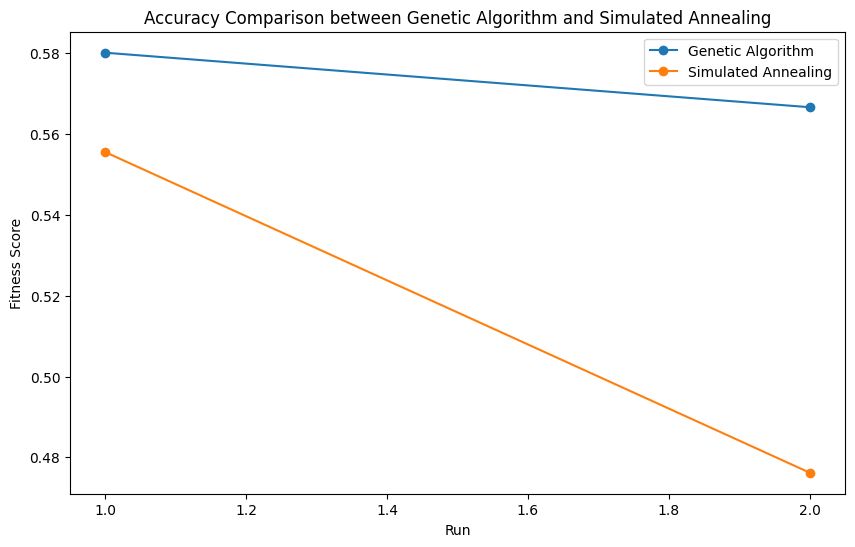

In [12]:
import matplotlib.pyplot as plt

# Function to run Genetic Algorithm and Simulated Annealing multiple times and collect fitness scores
def compare_algorithms(subG, budget, trials, generations, mutation_rate, initial_temperature, cooling_rate, num_runs):
    ga_fitness_scores = []
    sa_fitness_scores = []

    for _ in range(num_runs):
        # Run Genetic Algorithm
        best_seed_set_ga = genetic_algorithm(subG, budget, trials, generations, mutation_rate)
        fitness_ga = evaluate_fitness(subG, best_seed_set_ga, trials)
        ga_fitness_scores.append(fitness_ga)

        # Run Simulated Annealing
        best_seed_set_sa = simulated_annealing(subG, budget, trials, initial_temperature, cooling_rate)
        fitness_sa = evaluate_fitness(subG, best_seed_set_sa, trials)
        sa_fitness_scores.append(fitness_sa)

    return ga_fitness_scores, sa_fitness_scores

# Parameters for the comparison
num_runs = 2

# Run the comparison
ga_fitness_scores, sa_fitness_scores = compare_algorithms(subG, budget, trials, generations, mutation_rate, initial_temperature, cooling_rate, num_runs)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_runs + 1), ga_fitness_scores, label='Genetic Algorithm', marker='o')
plt.plot(range(1, num_runs + 1), sa_fitness_scores, label='Simulated Annealing', marker='o')
plt.title('Accuracy Comparison between Genetic Algorithm and Simulated Annealing')
plt.xlabel('Run')
plt.ylabel('Fitness Score')
plt.legend()
plt.show()
